**Load first table into SQL**

In [2]:
import pandas as pd
import sqlite3 as sql
import requests
import json

In [3]:
df_books = pd.read_csv('books_v2.csv')

In [4]:
df_books.head()

,bookID,title,authors,average_rating,isbn,isbn13_raw,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Column1
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [5]:
# Drop the unnamed column from the DataFrame
df_books = df_books.drop(columns=['Column1'])
df_books = df_books.drop(columns=['isbn13_raw'])

In [6]:
# Verify the updated DataFrame
df_books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [7]:
# Check for duplicate rows based on all columns
duplicate_rows = df_books[df_books.duplicated()]

In [8]:
# Display the duplicate rows
duplicate_rows

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
248,676,Sailing Alone Around the Room: New and Selecte...,Billy Collins,4.23,375755195,9780375755194,eng,192,12180,630,9/17/2002,Random House Trade Paperbacks
10778,43682,The Death Collectors (Carson Ryder #2),Jack Kerley,3.94,451218299,9780451218292,eng,400,1088,78,5/2/2006,Signet
10834,44183,Chemistry and Other Stories,Ron Rash,4.19,312425082,9780312425081,eng,230,601,79,9/5/2000,St. Martins Press-3PL
11041,45207,The Law and the Lady,Wilkie Collins/David Skilton,3.8,140436073,9780140436075,en-GB,383,120,15,9/24/1998,Penguin Classics


In [9]:
# Remove the dupes from the dataset 

df_books = df_books.drop_duplicates()

In [10]:
# Verify that the duplicate rows have been removed
duplicate_rows = df_books[df_books.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [bookID, title, authors, average_rating, isbn, isbn13, language_code,   num_pages, ratings_count, text_reviews_count, publication_date, publisher]
Index: []


In [11]:
# Identify rows where either isbn or isbn13 column is blank
blank_isbn = df_books[df_books['isbn'].isna() | df_books['isbn13'].isna()]

In [12]:
# Drop rows with blank isbn or isbn13 values
df_books = df_books.dropna(subset=['isbn', 'isbn13'])

In [13]:
# Verify that the rows have been dropped
blank_isbn_rows = df_books[df_books['isbn'].isna() | df_books['isbn13'].isna()]
print(blank_isbn_rows)

Empty DataFrame
Columns: [bookID, title, authors, average_rating, isbn, isbn13, language_code,   num_pages, ratings_count, text_reviews_count, publication_date, publisher]
Index: []


In [14]:
# Identify rows in which isbn number looks incorrect

invalid_isbn_rows = df_books[df_books['isbn'].astype(str).str.len() < 7]

In [15]:
# These are records that were imported incorrectly. The author column spilled into the average_rating so the data is one column off
invalid_isbn_rows

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4708,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,4/6/2004
5883,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999
8985,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,5/1/1977


In [16]:
# Define the list of book IDs to remove
book_ids_to_remove = [16914, 22128, 34889]

In [17]:
# Remove the rows with the specified book IDs
df_books = df_books.drop(df_books[df_books['bookID'].isin(book_ids_to_remove)].index)

In [18]:
# Rename num pages column
df_books = df_books.rename(columns={'  num_pages': 'num_pages'})

In [19]:
# Identify rows for books that have zero pages. 
zero_pages_rows = df_books[df_books['num_pages'] == '0']

In [20]:
zero_pages_rows

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
310,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.7,802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
860,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media
1068,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4,743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
1071,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.5,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
1237,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...,...
10036,40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media
10198,41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing
10630,43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio
10934,44748,The Mask of the Enchantress,Victoria Holt,3.85,449210847,9780449210840,eng,0,21,1,10/12/1981,Ivy Books


In [21]:
# Drop rows for books with no pages 

df_books = df_books[df_books['num_pages'] != '0']

In [22]:
# FINAL DATA SET FOR TABLE 1 
df_books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [23]:
# Establish connection to SQL 
conn = sql.connect('books.db')

In [24]:
#load to SQL
df_books.to_sql('books_table1', conn, if_exists='replace')

11111

In [25]:
books_table1 = pd.read_sql('SELECT * FROM books_table1', conn)

**Load table 2 into SQL**

In [26]:
# Import 
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_books'

In [27]:
tables = pd.read_html(url)

In [28]:
# Display an example of one table index. There are 14 tables on the wikipedia url listed above 

tables[0]

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[19][circular reporting?],Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[20][21],Children’s
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[22][23],Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100 million[24],Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100 million[25][26],Family saga
5,The Hobbit,J. R. R. Tolkien,English,1937,100 million[27][28][29],Fantasy


In [29]:
# Rename book series column to book to keep consistent across each table 
tables[4].rename(columns={'Book series': 'Book'}, inplace=True)
tables[5].rename(columns={'Book series': 'Book'}, inplace=True)
tables[6].rename(columns={'Book series': 'Book'}, inplace=True)
tables[7].rename(columns={'Book series': 'Book'}, inplace=True)
tables[8].rename(columns={'Book series': 'Book'}, inplace=True)

# Display one of the tables to show updated column name 
tables[4]

,Book,Author(s),Original language,No. of installments,First published,Approximate sales
0,Harry Potter,J. K. Rowling,English,7 + 3 companion books + 4 scripts,1997–2007,600 million[12]
1,Goosebumps,R. L. Stine,English,62 + spin-off series,1992–present,400 million[195]
2,Perry Mason,Erle Stanley Gardner,English,82 + 4 short stories,1933–1973,300 million[196]
3,Diary of a Wimpy Kid,Jeff Kinney,English,17 + 5 spin-offs,2007–present,275 million[197]
4,Berenstain Bears,Stan and Jan Berenstain,English,428,1962–present,260 million[198]
5,Choose Your Own Adventure,Various authors,English,185+,1979–present,250 million[199]
6,Sweet Valley High,Francine Pascal and ghostwriters,English,400,1983–2003,250 million[200]
7,The Railway Series,"Rev. W. Awdry, Christopher Awdry",English,42,1945–2011,201 million[201]
8,Noddy,Enid Blyton,English,24,1949–present,200 million[202]
9,Nancy Drew,Various authors as Carolyn Keene,English,175,1930–present,200 million[203]


In [30]:
df_books2 = pd.concat([tables[i] for i in range(1, 14)], ignore_index=True)

In [31]:
# Drop unnecessary columns 
df_books2 = df_books2.drop('No. of installments', axis=1)
df_books2 = df_books2.drop('No. of instalments', axis=1)

In [32]:
# Remove number in brackets from approximate sales column 
df_books2['Approximate sales'] = df_books2['Approximate sales'].str.replace(r'\[.*?\]', '', regex=True)

In [33]:
# FINAL DATA SET FOR TABLE 2
df_books2

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85 million,"Fantasy, Children's fiction"
1,She: A History of Adventure,H. Rider Haggard,English,1887,83 million,Adventure
2,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992,>80 million,Detective
3,The Da Vinci Code,Dan Brown,English,2003,80 million,Mystery thriller
4,Harry Potter and the Chamber of Secrets,J. K. Rowling,English,1998,77 million,Fantasy
...,...,...,...,...,...,...
320,"旺文社古語辞典 (Obunsha Kogo Jiten) ""Obunsha Dictiona...",Akira Matsumura,Japanese,1960,11 million,NaN
321,Hammond's Pocket Atlas,NaN,English,(Up to 1965),11 million,NaN
322,"三省堂国語辞典 (Sanseido Kokugo Jiten) ""Sanseido Dict...",Kenbō Hidetoshi,Japanese,1960,10 million,NaN
323,家庭に於ける実際的看護の秘訣 (Katei Ni Okeru Jissaiteki Kang...,Takichi Tsukuda,Japanese,1925,10 million,NaN


In [34]:
# Load df_books2 into SQL table 'books_table2'
df_books2.to_sql('books_table2', conn, if_exists='replace')

# Read data from 'books_table2' and assign it to books_table2 DataFrame
books_table2 = pd.read_sql('SELECT * FROM books_table2', conn)


**Load table 3 into SQL**

In [35]:
# Extract API data for series books, hardcover fiction, hardcover-nonfiction, paperback-books, mass-market-paperback

import requests
import pandas as pd

def fetch_book_data(list_name):
    api_key = 'Aayhps17yH8EUAWBksRZAhb71IzA2DCu'
    request_url = f"https://api.nytimes.com/svc/books/v3/lists.json?list={list_name}&api-key={api_key}"
    request_headers = {
        "Accept": "application/json"
    }

    response = requests.get(request_url, headers=request_headers)

    if response.status_code == 200:
        data = response.json()
        if 'results' in data:
            books = data['results']
            book_details_list = []

            for book in books:
                # Check if required fields are present
                if ('book_details' in book and book['book_details'] and
                    'title' in book['book_details'][0] and 'author' in book['book_details'][0] and
                    'published_date' in book and 'isbns' in book and book['isbns'] and len(book['isbns']) > 0):

                    title = book['book_details'][0]['title']
                    author = book['book_details'][0]['author']
                    published_date = book['published_date']
                    isbn = book['isbns'][0].get('isbn10', 'N/A')
                    isbn13 = book['isbns'][0].get('isbn13', 'N/A')

                    book_details = {
                        'Title': title,
                        'Author': author,
                        'Published Date': published_date,
                        'ISBN': isbn,
                        'ISBN13': isbn13,
                        'List': list_name  
                    }

                    book_details_list.append(book_details)

            return book_details_list

        else:
            print(f"No results found for list: {list_name}")
            return None
    else:
        print(f"API request failed with status code {response.status_code}")
        return None

if __name__ == "__main__":
    # List of desired book lists
    book_lists = ['series-books', 'hardcover-fiction', 'hardcover-nonfiction', 'paperback-books', 'mass-market-paperback']

    # Fetch and combine data for all book lists
    all_books_data = []
    for list_name in book_lists:
        list_data = fetch_book_data(list_name)
        if list_data:
            all_books_data.extend(list_data)

    # Create the DataFrame
    df_books3 = pd.DataFrame(all_books_data)

In [36]:
# FINAL DATASET FOR TABLE 3
df_books3

,Title,Author,Published Date,ISBN,ISBN13,List
0,THE SUMMER I TURNED PRETTY TRILOGY,Jenny Han,2023-08-20,1416995587,9781416995586,series-books
1,THE HUNGER GAMES,Suzanne Collins,2023-08-20,0439023521,9780439023528,series-books
2,A GOOD GIRL'S GUIDE TO MURDER,Holly Jackson,2023-08-20,1984896369,9781984896360,series-books
3,DIARY OF A WIMPY KID,and Jeff Kinney,2023-08-20,0810993139,9780810993136,series-books
4,HARRY POTTER,J.K. Rowling,2023-08-20,059035342X,9780590353427,series-books
...,...,...,...,...,...,...
59,WAR HAWK,James Rollins and Grant Blackwood,2017-01-29,0062135279,9780062135278,mass-market-paperback
60,PROPERTY OF A NOBLEWOMAN,Danielle Steel,2017-01-29,034553106X,9780345531063,mass-market-paperback
61,CLAWBACK,J A Jance,2017-01-29,1501110721,9781501110726,mass-market-paperback
62,TROUBLEMAKER,Linda Howard,2017-01-29,0062419005,9780062419002,mass-market-paperback


In [37]:
# Load df_books3 into SQL table 'books_table3'
df_books3.to_sql('books_table3', conn, if_exists='replace')

# Read data from 'books_table3' and assign it to books_table3 DataFrame
books_table3 = pd.read_sql('SELECT * FROM books_table3', conn)

In [38]:
# Display final 3 tables 

# Rename isbn13 column so we can join to other table 
books_table1.rename(columns={'isbn13': 'ISBN13'}, inplace=True)
books_table1.head()

,index,bookID,title,authors,average_rating,isbn,ISBN13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [39]:
books_table2.head()

,index,Book,Author(s),Original language,First published,Approximate sales,Genre
0,0,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85 million,"Fantasy, Children's fiction"
1,1,She: A History of Adventure,H. Rider Haggard,English,1887,83 million,Adventure
2,2,Vardi Wala Gunda (वर्दी वाला गुंडा),Ved Prakash Sharma,Hindi,1992,>80 million,Detective
3,3,The Da Vinci Code,Dan Brown,English,2003,80 million,Mystery thriller
4,4,Harry Potter and the Chamber of Secrets,J. K. Rowling,English,1998,77 million,Fantasy


In [40]:
books_table3.head()

,index,Title,Author,Published Date,ISBN,ISBN13,List
0,0,THE SUMMER I TURNED PRETTY TRILOGY,Jenny Han,2023-08-20,1416995587,9781416995586,series-books
1,1,THE HUNGER GAMES,Suzanne Collins,2023-08-20,0439023521,9780439023528,series-books
2,2,A GOOD GIRL'S GUIDE TO MURDER,Holly Jackson,2023-08-20,1984896369,9781984896360,series-books
3,3,DIARY OF A WIMPY KID,and Jeff Kinney,2023-08-20,0810993139,9780810993136,series-books
4,4,HARRY POTTER,J.K. Rowling,2023-08-20,059035342X,9780590353427,series-books


In [41]:
# Perform an inner join between book_table1 and book_table3 on 'isbn13' column
df1 = pd.merge(books_table1, books_table3, on='ISBN13', how='inner')

df1

,index_x,bookID,title,authors,average_rating,isbn,ISBN13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,index_y,Title,Author,Published Date,ISBN,List
0,11136,45644,THE SUMMER I TURNED PRETTY TRILOGY,Jenny Han,3.83,1416995587,9781416995586,eng,796,6,2,3/1/2003,Scholastic,0,THE SUMMER I TURNED PRETTY TRILOGY,Jenny Han,2023-08-20,1416995587,series-books
1,11137,45645,THE HUNGER GAMES,Suzanne Collins,3.83,0439023521,9780439023528,eng,70,26,1,3/1/1998,Scholastic Inc.,1,THE HUNGER GAMES,Suzanne Collins,2023-08-20,0439023521,series-books
2,11138,45646,A GOOD GIRL'S GUIDE TO MURDER,Holly Jackson,3.83,1984896369,9781984896360,eng,398,11418,743,11/1/1998,Scholastic,2,A GOOD GIRL'S GUIDE TO MURDER,Holly Jackson,2023-08-20,1984896369,series-books
3,11139,45647,DIARY OF A WIMPY KID,and Jeff Kinney,4.13,0810993139,9780810993136,eng,463,364,46,3/15/2005,Nimble Books,3,DIARY OF A WIMPY KID,and Jeff Kinney,2023-08-20,0810993139,series-books
4,11140,45648,HARRY POTTER,J.K. Rowling,4.42,059035342X,9780590353427,eng,224,22378,1613,3/1/2002,Scholastic,4,HARRY POTTER,J.K. Rowling,2023-08-20,059035342X,series-books
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,11195,45703,WAR HAWK,James Rollins and Grant Blackwood,4.1,0062135279,9780062135278,eng,335,72451,4245,2/1/1997,Houghton Mifflin Harcourt,59,WAR HAWK,James Rollins and Grant Blackwood,2017-01-29,0062135279,mass-market-paperback
60,11196,45704,PROPERTY OF A NOBLEWOMAN,Danielle Steel,3.71,034553106X,9780345531063,eng,304,49240,2211,8/31/2004,Houghton Mifflin Harcourt,60,PROPERTY OF A NOBLEWOMAN,Danielle Steel,2017-01-29,034553106X,mass-market-paperback
61,11197,45705,CLAWBACK,J A Jance,3.95,1501110721,9781501110726,eng,299,45712,2257,7/1/2006,Pragmatic Bookshelf,61,CLAWBACK,J A Jance,2017-01-29,1501110721,mass-market-paperback
62,11198,45706,TROUBLEMAKER,Linda Howard,3.89,0062419005,9780062419002,eng,254,48701,2238,11/17/1992,Atheneum Books for Young Readers: Richard Jack...,62,TROUBLEMAKER,Linda Howard,2017-01-29,0062419005,mass-market-paperback


**Data Visualizations**

In [42]:
import matplotlib.pyplot as plt 
import numpy as np

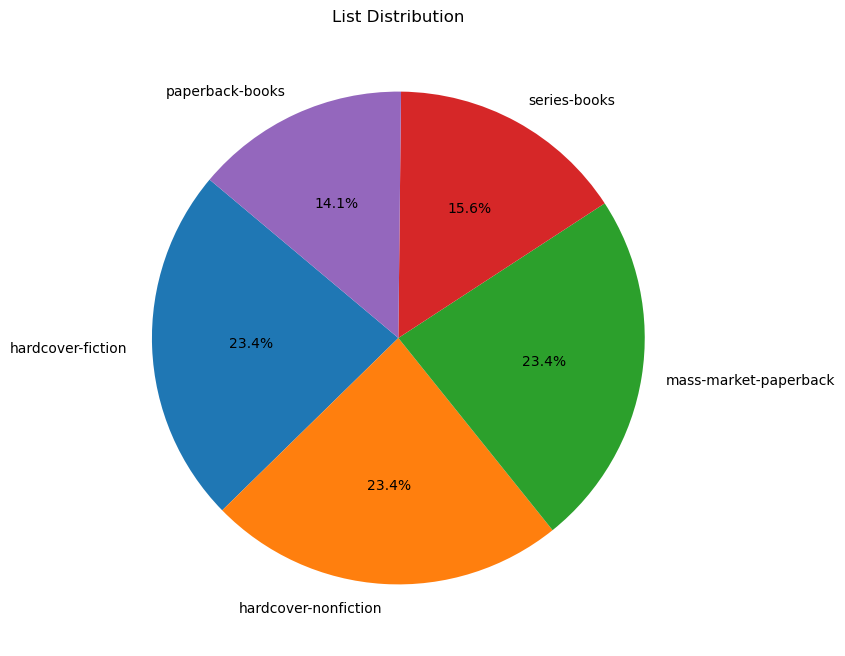

In [43]:
# List distribution pie chart 
genre_distribution = books_table3['List'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('List Distribution')
plt.show()

In [44]:
import matplotlib.pyplot as plt

# Convert 'num_pages' column to numeric
books_table1['num_pages'] = pd.to_numeric(books_table1['num_pages'], errors='coerce')


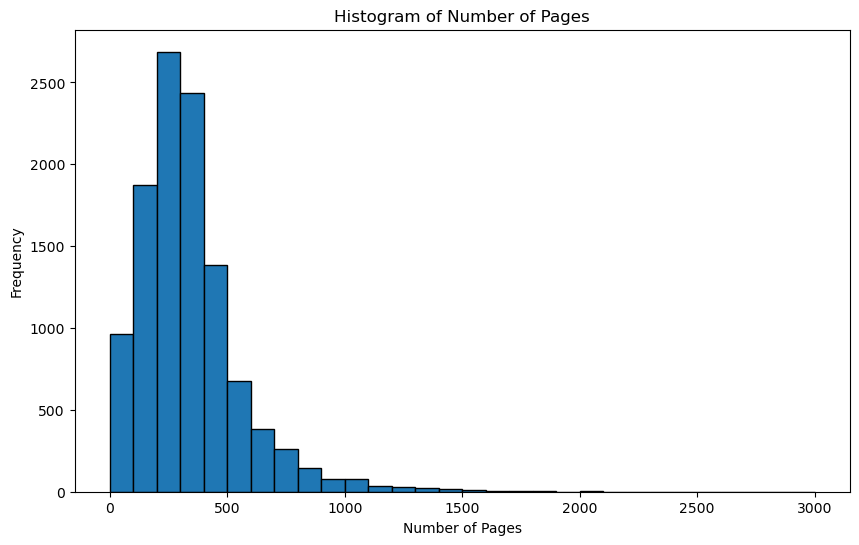

In [45]:
# Histogram of Number of pages 

plt.figure(figsize=(10, 6))
plt.hist(books_table1['num_pages'], bins=range(0, 3100, 100), edgecolor='black')
plt.title('Histogram of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

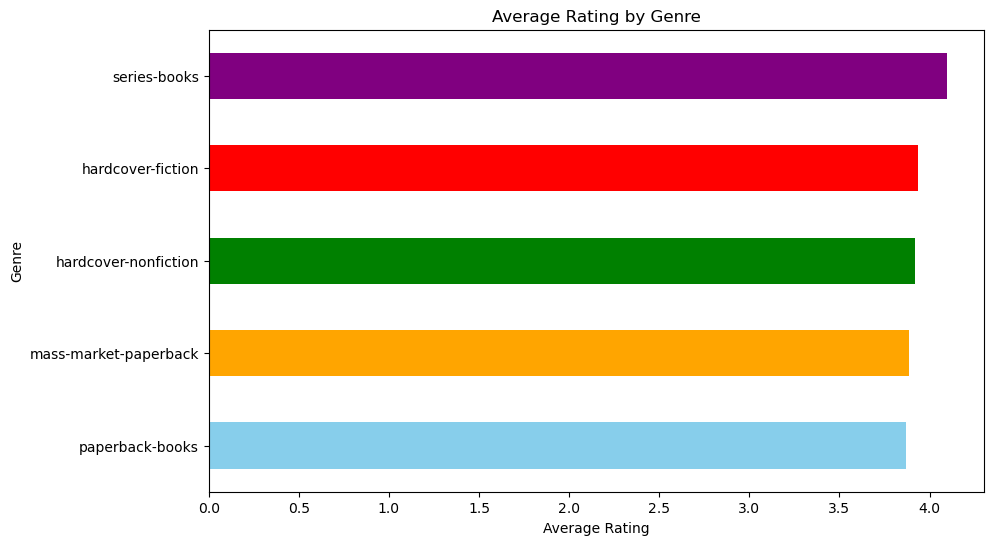

In [46]:
# Bar chart for Average Rating by Genre

# Clean the 'average_rating' column by removing non-numeric characters and converting to float
df1['average_rating'] = df1['average_rating'].str.replace('[^\d.]', '', regex=True).astype(float)


# Group by genre and calculate average rating
average_rating_by_genre = df1.groupby('List')['average_rating'].mean()

# Define colors for each genre
colors = ['skyblue', 'orange', 'green', 'red', 'purple'] 

# Create a bar plot
plt.figure(figsize=(10, 6))
average_rating_by_genre.sort_values().plot(kind='barh', color=colors)
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

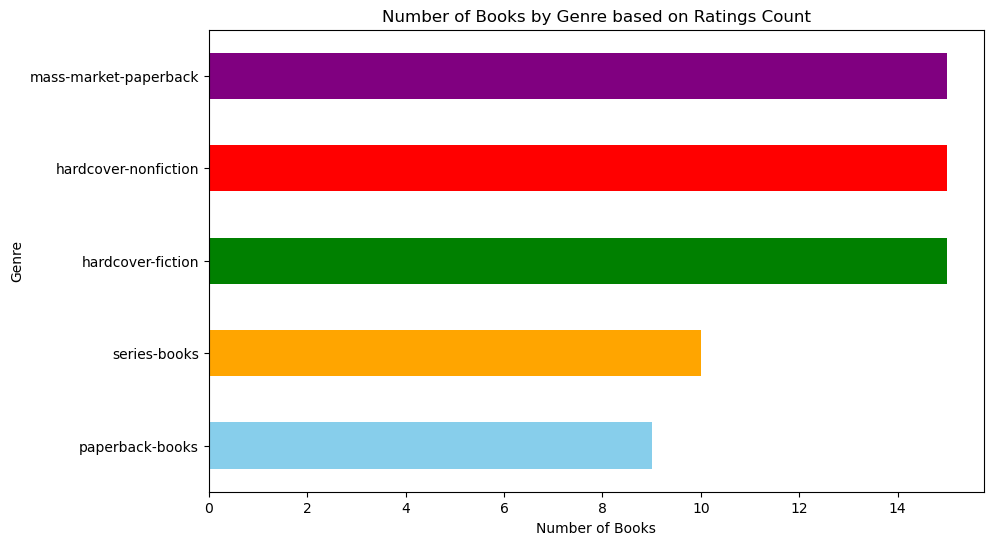

In [47]:
# Book count by Genre 

# Convert the 'ratings_count' column to float
df1['ratings_count'] = df1['ratings_count'].astype(float)

# Group by genre and count the number of books
books_count_by_genre = df1.groupby('List').size()

# Define colors for each genre
colors = ['skyblue', 'orange', 'green', 'red', 'purple'] 

# Create a bar plot
plt.figure(figsize=(10, 6))
books_count_by_genre.sort_values().plot(kind='barh', color=colors)
plt.title('Number of Books by Genre based on Ratings Count')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()

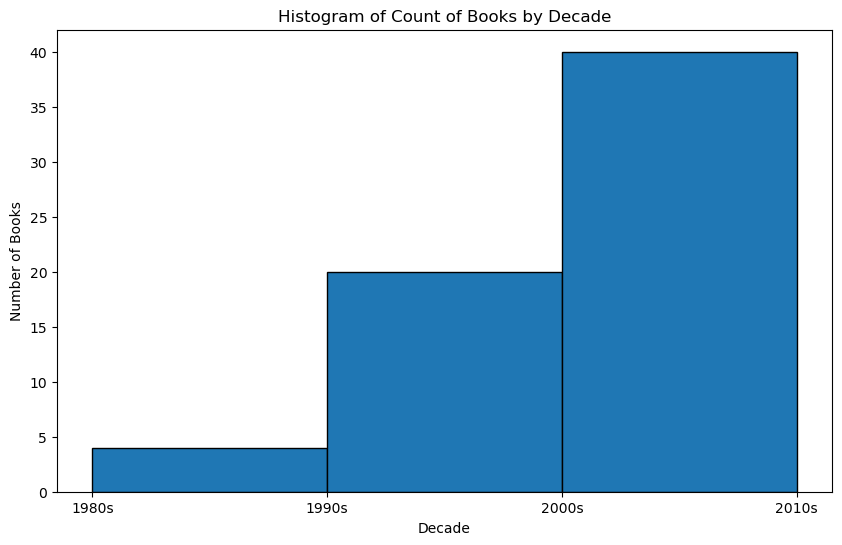

In [48]:
# Book count by Decade of Publication Date

# Convert the 'publication_date' column to datetime format
df1['publication_date'] = pd.to_datetime(df1['publication_date'])

# Extract the decade from the 'publication_date' column
df1['decade'] = (df1['publication_date'].dt.year // 10) * 10

# Group by decade and count the number of books
books_count_by_decade = df1.groupby('decade').size()

# Histogram of books by decade
plt.figure(figsize=(10, 6))
plt.hist(books_count_by_decade.index, weights=books_count_by_decade.values, bins=range(min(books_count_by_decade.index), max(books_count_by_decade.index) + 10, 10), edgecolor='black')
plt.title('Histogram of Count of Books by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.xticks(books_count_by_decade.index, labels=[str(decade) + 's' for decade in books_count_by_decade.index])
plt.show()

**SUMMARY**

Overall in order to complete this term project, I took book data from 3 different sources. The first data source was from a csv file, the second data came from tables on a website, and the last source was book data that was pulled using API. Each dataset provided different struggles when it came to cleaning the data and getting one finalized dataset to work with. 

The dataset that I struggled the most was the second dataset. The reason for this is that when deciding to use book data for this term project, I was reliant on the Internation Serial Book Number (ISBN) value which is a unique ID for each book. Therefore, I had no issues when joining table 1 and table 3 on ISBN and was able to create data visualzations from the merged dataset. Unfortunately, as much as I looked, I was unable to find a table online that included the ISBN numbers. This meant that I was unable to cleanly join data from my second dataset. I experimented with joining on the combination of title and author as that would be more unique, but when joining on text from different sources, even the slightest difference in how something is typed or worded can provide difficulties. With more time, a workaround would have been to manually look up the ISBN for all the books in the second dataset and manually add them into the table so I could merge it with the other datasets, but for the purpose of this project I focused on tables 1 and 3. This taught me that I need to be very deliberate with the data I choose to work with from the beginning. 

Lastly, I did make some transformations to the data in order to have clean final datasets to use. Transformations included dropping recorcds for books with no pages, removing incorrect ISBN values, removing duplicates, reformatting dates to be certain formats, and renaming columns for consistency. This means there were some limitations to the data, but I am satisfied with the final working datasets and the visuals created from them. Ethically I removed dupes and made attempts to have the quality and accuracy of data be more reliable. 